# Conteo de valoraciones y probabilidad de satisfacción por servicio
Este notebook carga el CSV `airline_passenger_satisfaction.csv` y genera, para cada servicio, el conteo de valoraciones (0-5) y la probabilidad condicional de que el pasajero esté `satisfied` dado cada valoración.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
SERVICES = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
]

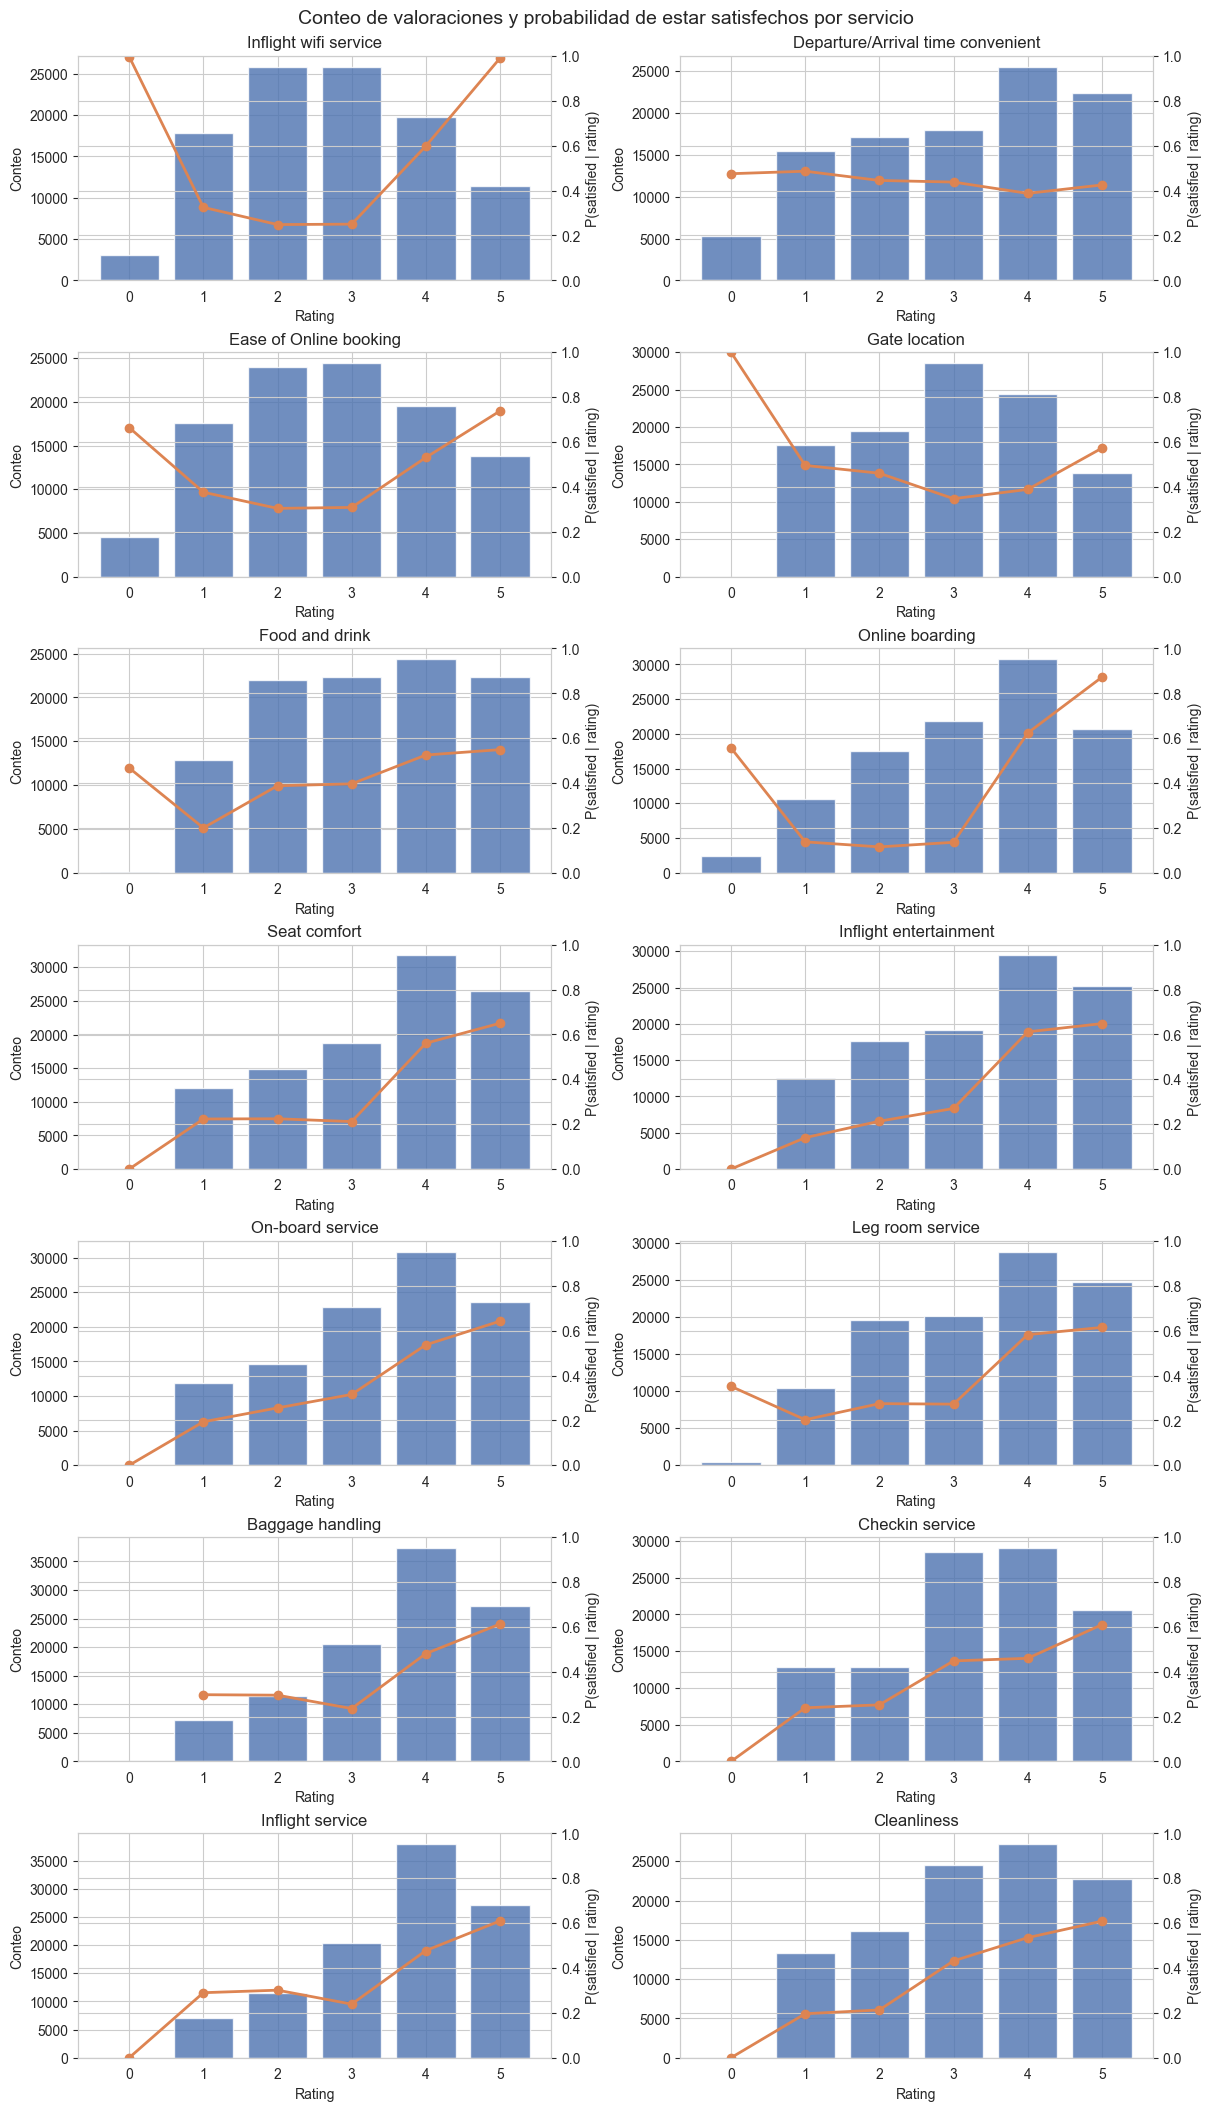

Gráfica guardada en: ..\plots\service_satisfaction.png


In [3]:
# Ajusta la ruta según la ubicación del notebook (está en /notebooks)
csv_path = os.path.join('..', 'data', 'airline_passenger_satisfaction.csv')
df = pd.read_csv(csv_path)
df['satisfied_flag'] = (df['satisfaction'] == 'satisfied').astype(int)

out_path = os.path.join('..', 'plots', 'service_satisfaction.png')
os.makedirs(os.path.dirname(out_path), exist_ok=True)

n = len(SERVICES)
cols = 2
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3), constrained_layout=True)
axes = axes.flatten()

for i, service in enumerate(SERVICES):
    ax = axes[i]
    counts = df[service].value_counts().reindex(range(0,6), fill_value=0).sort_index()
    probs = df.groupby(service)['satisfied_flag'].mean().reindex(range(0,6))

    ax.bar(counts.index, counts.values, color='#4C72B0', alpha=0.8)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Conteo')
    ax.set_xticks(range(0,6))
    ax.set_title(service)

    ax2 = ax.twinx()
    ax2.plot(probs.index, probs.values, color='#DD8452', marker='o', linestyle='-', linewidth=2)
    ax2.set_ylabel('P(satisfied | rating)')
    ax2.set_ylim(0,1)

# eliminar subplots vacíos si existen
for j in range(n, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Conteo de valoraciones y probabilidad de estar satisfechos por servicio', fontsize=14)
fig.savefig(out_path, dpi=150)
plt.show()
print(f'Gráfica guardada en: {out_path}')

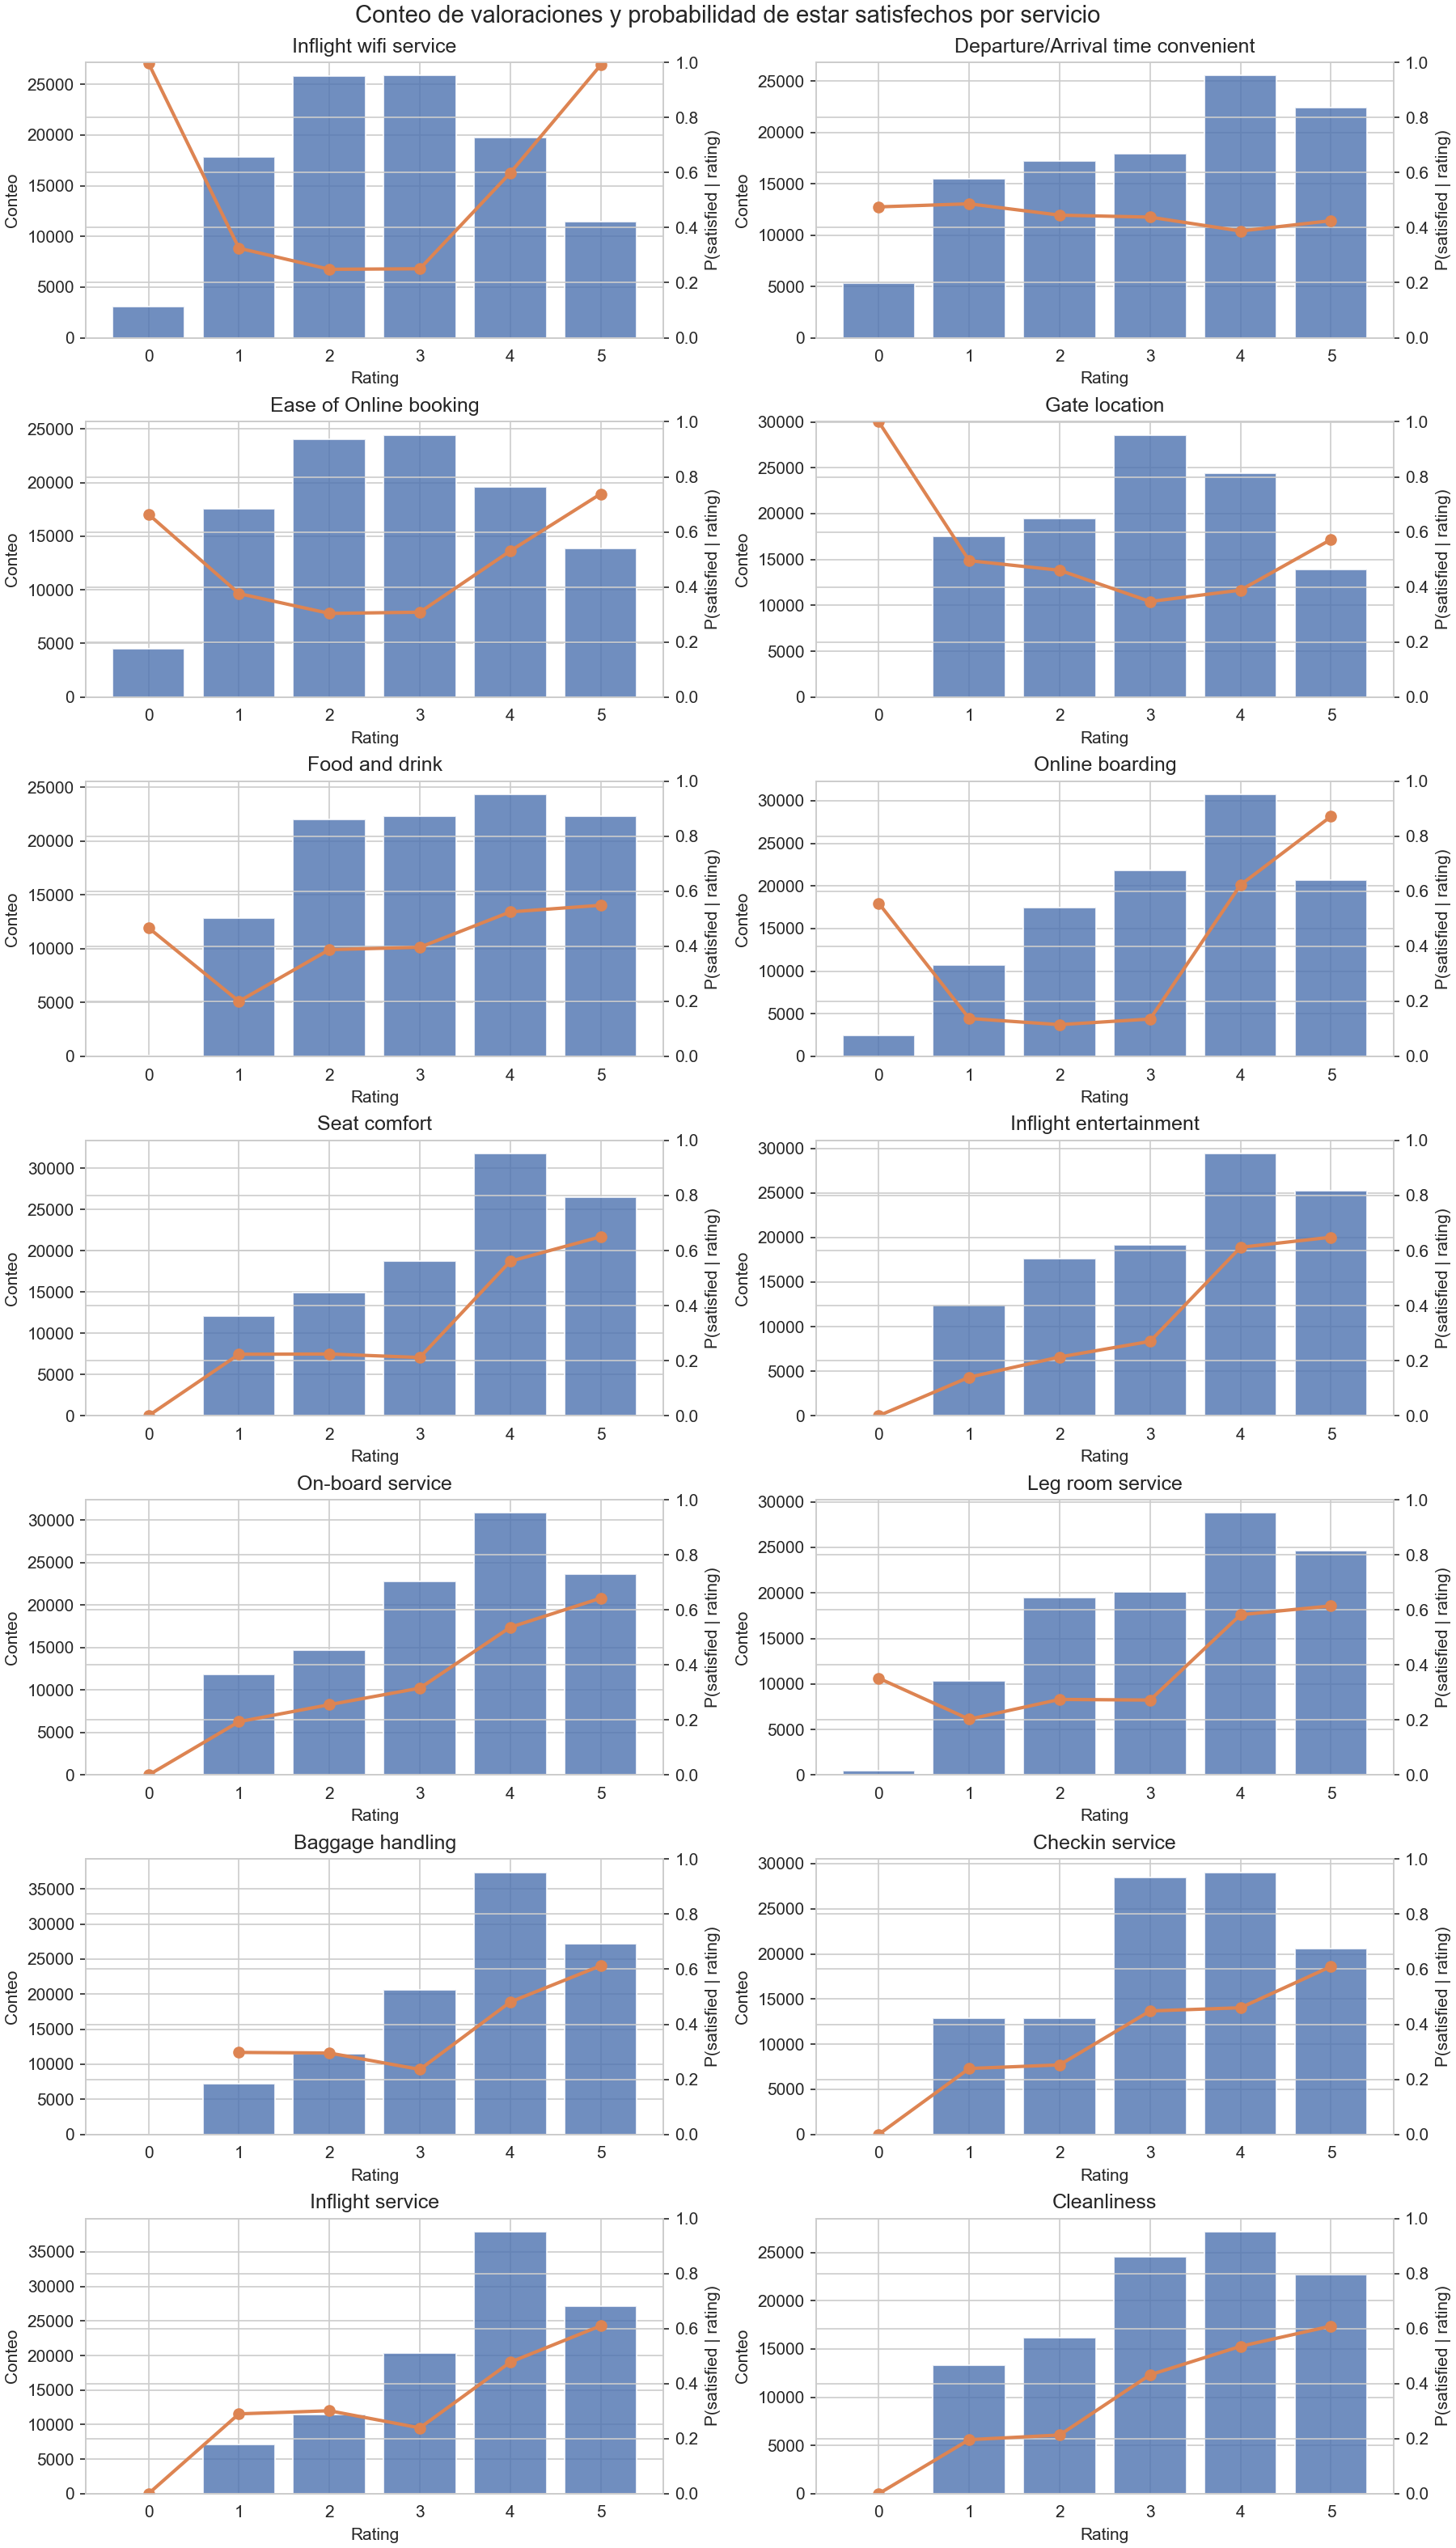

In [4]:
# Mostrar la imagen guardada
display(Image(filename=out_path))